# The BAK–TANG–WIESENFELD Sandpile

[source](http://93.174.95.29/_ads/F7595E1E9FFC863A0D77117778C3E77C)
page 85

## General features

+ First published by Bak, Tang, and Wiesenfeld (1987).
+ Motivated by avalanching behaviour of a real sandpile.
+ In one dimension rules represent downward movement of sand grains.
+ Defined in any dimension, exactly solved (trivial) in one.
+ Stochastic (bulk) drive, deterministic relaxation.
+ Non-Abelian in its original definition.
+ Many results actually refer to Dhar’s (1990a) Abelian sandpile, Sec. 4.2.
+ Simple scaling behaviour disputed, multiscaling proposed.
+ Exponents listed in Table 4.1, p. 92, are for the Abelian BTW Model.

## Rules

+ d dimensional (usually) hyper-cubic lattice and q the coordination number (on cubic lattices q = 2d).
+ Choose (arbitrary) critical slope z^c = q − 1.
+ Each site n ∈ {1,..., L}^d has slope z_n.
+ _Initialisation_: irrelevant, model studied in the stationary state.
+ _Driving_: add a grain at n0 chosen at random and update all uphill nearest neighbours n'0 of n0:
z_n0 →z_n0 + q/2
z_n0 →z_n'0 − 1.
+ _Toppling_: for each site n with z_n > z^c distribute q grains among its nearest neighbours n'
:
z_n →z_n − q
∀n'.nn.n z_n →z_n + 1.
In one dimension site n = L relaxes according to 
z_L → z_L − 1
z_L−1 → z_L−1 + 1.
+ _Dissipation_: grains are lost at open boundaries.
+ _Parallel update_: discrete microscopic time, sites exceeding zc at time t topple at t + 1 (updates in
sweeps).
+ _Separation of time scales_: drive only once all sites are stable, i.e. z_n ≤ z^c (quiescence).
+ _Key observables_ (see Sec. 1.3):
avalanche sizes, the total number of topplings until quiescence;
avalanche duration T , the total number of parallel updates until quiescence


In [1]:
cd ..

\\surface\Users\ofcra\Dev\socsim


In [2]:
from SOC.models import BTW

## Empty model

In [3]:
b = BTW(L = 50, save_every = 50)

## Running model

In [21]:
b.run(200000, wait_for_n_iters = 100)

Waiting for wait_for_n_iters=100 iterations before collecting data. This should let the system thermalize.
100%|██████████| 200100/200100 [01:39<00:00, 2009.38it/s]


In [12]:
b.data_df.describe()

,AvalancheSize,NumberOfReleases,number_of_iterations
count,3000.000000,3000.000000,3000.000000
mean,17.533333,12.688000,3.913333
std,46.635057,40.980578,9.568020
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,8.000000,2.000000,2.000000
max,346.000000,525.000000,76.000000


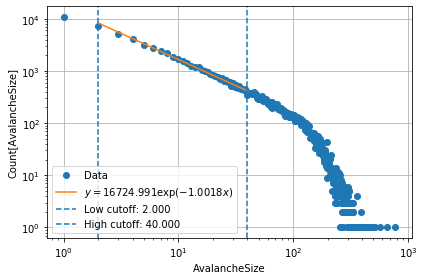

y = 16724.991 exp(-1.0018 x)


{'exponent': -1.0017738535137397, 'intercept': 4.223365899549503}

In [26]:
b.get_exponent(low = 2, high = 40)

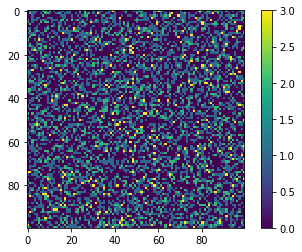

In [9]:
b.plot_state();

In [8]:
%matplotlib inline
a = BTW(100, save_every = 1)
a.run(1000)

Waiting for wait_for_n_iters=10 iterations before collecting data. This should let the system thermalize.
100%|██████████| 1010/1010 [00:07<00:00, 134.19it/s]


In [10]:
a.animate_states(notebook = True)

RuntimeError: Requested MovieWriter (ffmpeg) not available

## Uniform model load

In [6]:
c = BTW(100)
c.values[1:-1,1:-1] = 10

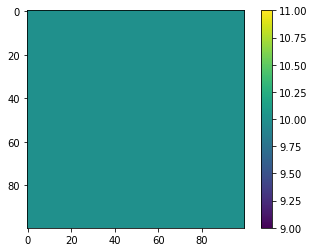

In [7]:
c.plot_state();

In [8]:
c.AvalancheLoop()

{'AvalancheSize': 10000,
 'NumberOfReleases': 28191892,
 'number_of_iterations': 6920}

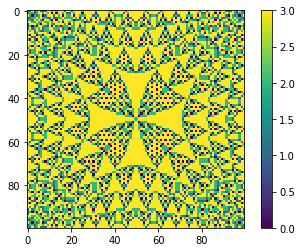

In [9]:
c.plot_state();

### Does pattern depend on height of load?

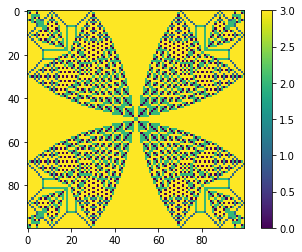

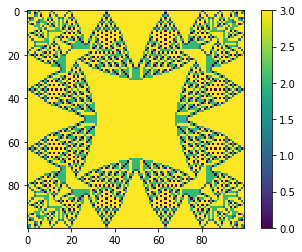

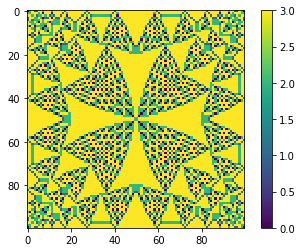

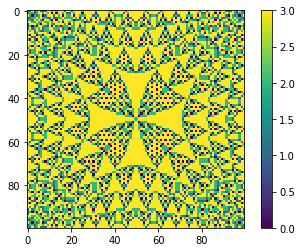

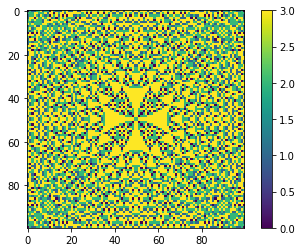

In [10]:
for i in [4, 5, 6, 10, 20]:
    mdl = BTW(100)
    mdl.values[1:-1,1:-1] = i
    mdl.AvalancheLoop()
    mdl.plot_state();

As we can see patter is changeing depending of pile height. __Is there some maximum load__?

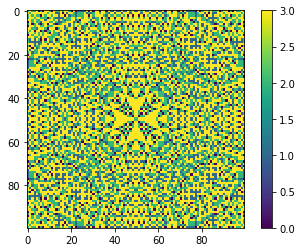

In [12]:
mdl = BTW(100)
mdl.values[1:-1,1:-1] = 40
mdl.AvalancheLoop()
mdl.plot_state();

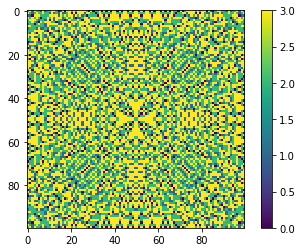

In [13]:
mdl = BTW(100)
mdl.values[1:-1,1:-1] = 50
mdl.AvalancheLoop()
mdl.plot_state();

Pattern depends on load height.

### Loading model in the single point at centr.

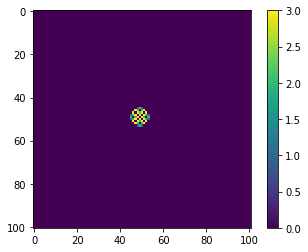

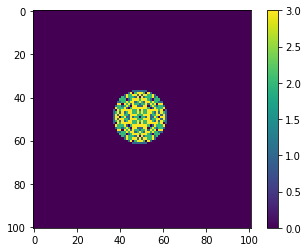

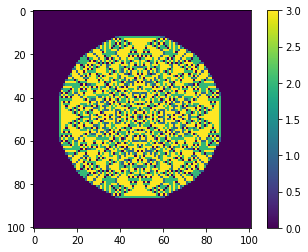

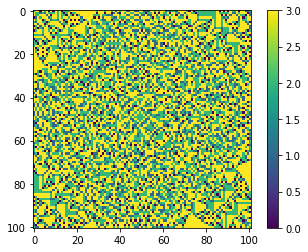

In [18]:
for i in [10**2, 10**3, 10**4, 10**5]:
    mdl = BTW(101)
    mdl.values[50,50] = i
    mdl.AvalancheLoop()
    mdl.plot_state();

## How exponent dependce on size of system?

In [12]:
zip([10, 50, 100, 500],[1,1,1,1])

Waiting for wait_for_n_iters=30000 iterations before collecting data. This should let the system thermalize.
100%|██████████| 90000/90000 [00:05<00:00, 15071.11it/s]


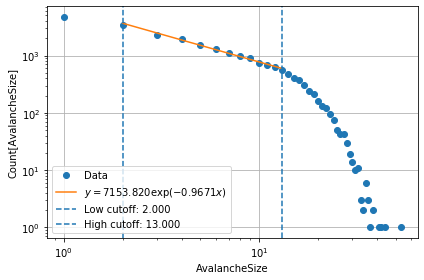

y = 7153.820 exp(-0.9671 x)
Waiting for wait_for_n_iters=30000 iterations before collecting data. This should let the system thermalize.
100%|██████████| 90000/90000 [00:22<00:00, 4002.18it/s]


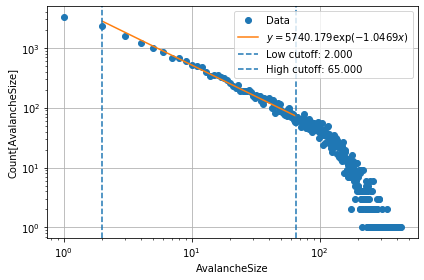

y = 5740.179 exp(-1.0469 x)
Waiting for wait_for_n_iters=30000 iterations before collecting data. This should let the system thermalize.
100%|██████████| 90000/90000 [01:57<00:00, 767.70it/s]


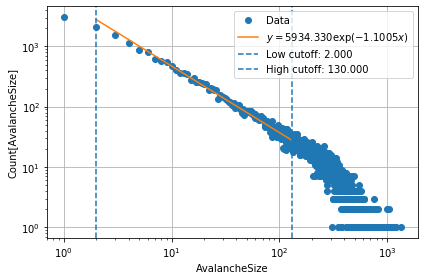

y = 5934.330 exp(-1.1005 x)
Waiting for wait_for_n_iters=50000 iterations before collecting data. This should let the system thermalize.
100%|██████████| 150000/150000 [11:17<00:00, 221.35it/s]


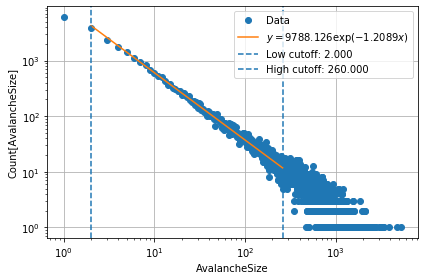

y = 9788.126 exp(-1.2089 x)


In [3]:
for l, w in zip([10, 50, 100, 200], [3*100**2, 3*100**2, 3*100**2, 5*100**2]):
    mdl = BTW(L = l, save_every = 100)
    mdl.run(2*w, wait_for_n_iters = w)
    mdl.get_exponent(low = 2, high = 1.3*l)